# DC1d modelling and inversion
We want to use direct-current (DC) modelling for 1D layered Earth models.
This is readily implemented in the pyGIMLi (Python Geophysical Modelling and Inversion module).
We make use of the `PyCall` library to call the codes from Julia.

In [11]:
using PyCall
using PyPlot

In [12]:
pg=pyimport("pygimli")

PyObject <module 'pygimli' from 'C:\\Guenther.T\\src\\gimli\\gimli\\pygimli\\__init__.py'>

In [13]:
pos=pg.Pos([1, 1, 0])
mesh=pg.createGrid(5,5)
print(mesh)

PyObject <pygimli.core._pygimli_.Mesh object at 0x0000000041AD8210>

In [28]:
# We define a AB/2 vector going from 1 to 1000m
ab2 = 10 .^ (0:0.1:3);

In [30]:
# Now we define a 1D DC forward operator, for MN/2 we use AB/2 / 3
f = pg.core.DC1dModelling(3, ab2, ab2/3)

PyObject <pygimli.core._pygimli_.DC1dModelling object at 0x000000005F1A56B0>

In [16]:
rhoa = f([5, 5, 100, 20, 100]).array()

26-element Array{Float64,1}:
 99.89875812491564
 99.80013105778382
 99.60780410152859
 99.23757033654731
 98.53881706631796
 97.25869875736923
 95.01373403971184
 91.31358362955858
 85.71101252456035
 78.12355887788368
 69.21730098791933
 60.528852644224415
 54.01157480285244
 51.12544110575363
 52.11543699630806
 56.06960471870922
 61.63499832109359
 67.70981926365786
 73.6501820502757
 79.12354151234618
 83.94491524936281
 88.01507340242368
 91.30913103819972
 93.86746579898208
 95.77823516067845
 97.15517695370309

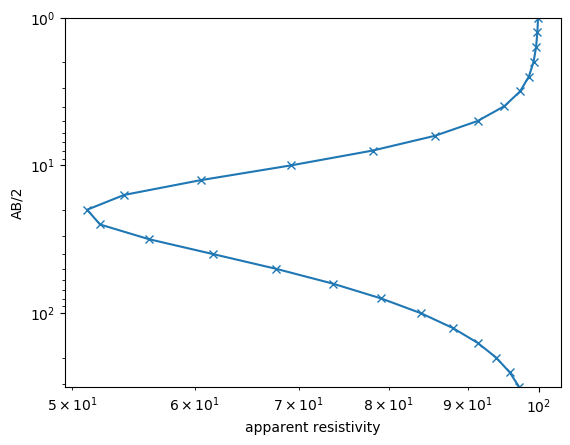

PyObject Text(24.000000000000007, 0.5, 'AB/2')

In [19]:
loglog(rhoa, ab2, "x-")
ylim(ab2[end], ab2[1])
xlabel("apparent resistivity")
ylabel("AB/2")

Whereas `DC1dModelling` gets thickness and resistivity values, there is a variant `DC1dRhoModelling` for only resistivity using a predefined thickness vector. This is made for smoothness-constrained inversion.

In [33]:
thk = ones(30)
fRho = pg.core.DC1dRhoModelling(thk, ab2, ab2/3);

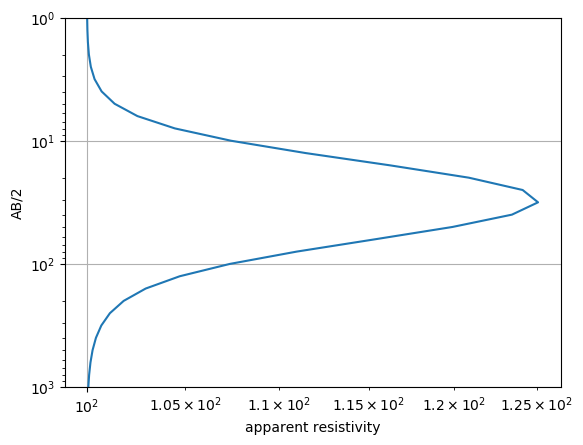

In [37]:
rho = ones(length(thk)+1) * 100
rho[10] = 1000
rhoa = fRho(rho).array()
loglog(rhoa, ab2)
grid()
ylim(ab2[end], ab2[1])
xlabel("apparent resistivity")
ylabel("AB/2");

## Task
1. Write a Julia function using the variable-layer forward operator 
1. Write a Julia function using the fixed-layer forward operator 
1. generate a synthetic three-layer model and compute its forward response
1. write a function for computing the Jacobian matrix using the perturbation method
$$ \frac{\partial {\bf f}({\bf m})}{\partial m_j} \approx
\frac{{\bf f}({\bf m} + \delta_j\Delta m )-{\bf f}({\bf m})}{\Delta m} $$
1. Start with a homogeneous resistivity model.
1. compute its Jacobian matrix and display it using matshow

## Task 2:
Generate a three-layer model of which the first and last resistivity model and the thickness of the first layer is assumed constant. Vary the second layer resistivity and thickness over a certain range and plot the resulting objective function as a matrix.